# Notebook to reproduce all downstream analyses from gyōza-generated data

## Import libraries

In [1]:
import papermill as pm

## Estimate bottlenecks in initial libraries

In [2]:
o = pm.execute_notebook(
    "bottlenecks.ipynb",
    "../parameterized/bottlenecks/run.ipynb",
)

Executing:   0%|          | 0/13 [00:00<?, ?cell/s]

## Estimate replicability

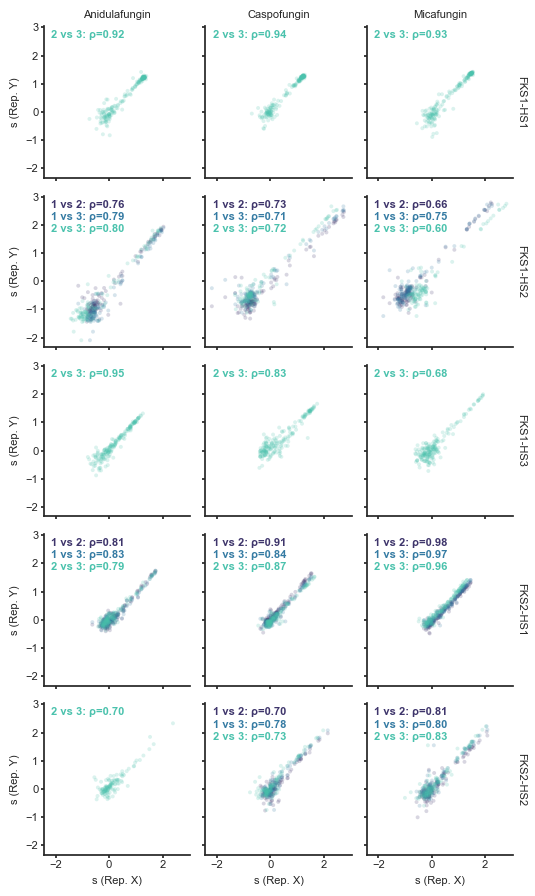

In [3]:
%run ../scripts/plot_replicates.py

## Train GMM

In [4]:
for strain, locus in [
    ("BY4741", "FKS1-HS1"),
    ("BY4741", "FKS1-HS2"),
    ("BY4741", "FKS1-HS3"),
    ("R1158", "FKS2-HS1"),
    ("R1158", "FKS2-HS2"),
]:
    print(strain, locus)
    o = pm.execute_notebook(
        "train_GMM.ipynb",
        f"../parameterized/GMM_training/{strain}_{locus}.ipynb",
        parameters={"strain": strain, "locus": locus},
    )

BY4741 FKS1-HS1


Executing:   0%|          | 0/44 [00:00<?, ?cell/s]

BY4741 FKS1-HS2


Executing:   0%|          | 0/44 [00:00<?, ?cell/s]

BY4741 FKS1-HS3


Executing:   0%|          | 0/44 [00:00<?, ?cell/s]

R1158 FKS2-HS1


Executing:   0%|          | 0/44 [00:00<?, ?cell/s]

R1158 FKS2-HS2


Executing:   0%|          | 0/44 [00:00<?, ?cell/s]

## Validate growth data

DMS data are compared to growth data from reconstructed mutants by performing a linear regression. An inferred selection coefficient is obtained for some FKS1-HS1 mutants missing from the DMS dataset, as well as for two mutants whose selection coefficient was underestimated by gyōza (in one condition). 

In [5]:
o = pm.execute_notebook(
    "20240129_validations_test3.ipynb",
    "../parameterized/validations/run.ipynb",
)

Executing:   0%|          | 0/34 [00:00<?, ?cell/s]

In [6]:
%run ../scripts/rescue_missing_mutants.py

## Classify variants

In [7]:
%run ../scripts/classify_variants.py -i refined_classification_with_missing.csv -o refined_classification.csv --strain BY4741 --locus FKS1-HS1
%run ../scripts/classify_variants.py -i refined_classification.csv -o refined_classification.csv --strain BY4741 --locus FKS1-HS2
%run ../scripts/classify_variants.py -i refined_classification.csv -o refined_classification.csv --strain BY4741 --locus FKS1-HS3
%run ../scripts/classify_variants.py -i refined_classification.csv -o refined_classification.csv --strain R1158 --locus FKS2-HS1
%run ../scripts/classify_variants.py -i refined_classification.csv -o refined_classification.csv --strain R1158 --locus FKS2-HS2
%run ../scripts/classify_variants.py -i /home/rodur28/dev/durr1602/fks_gyoza/results/df/avg_scores_BY_ortho.csv -o refined_classification_ortho.csv --strain BY4741 --locus FKS1-HS1

##  Compare with FungAMR

In [8]:
for strain, locus in [
    ("BY4741", "FKS1-HS1"),
    ("BY4741", "FKS1-HS2"),
    ("BY4741", "FKS1-HS3"),
    ("R1158", "FKS2-HS1"),
    ("R1158", "FKS2-HS2"),
]:
    print(strain, locus)
    o = pm.execute_notebook(
        "compare_to_fungamr.ipynb",
        f"../parameterized/fungamr/{strain}_{locus}.ipynb",
        parameters={"strain": strain, "locus": locus},
    )

BY4741 FKS1-HS1


Executing:   0%|          | 0/15 [00:00<?, ?cell/s]

BY4741 FKS1-HS2


Executing:   0%|          | 0/15 [00:00<?, ?cell/s]

BY4741 FKS1-HS3


Executing:   0%|          | 0/15 [00:00<?, ?cell/s]

R1158 FKS2-HS1


Executing:   0%|          | 0/15 [00:00<?, ?cell/s]

R1158 FKS2-HS2


Executing:   0%|          | 0/15 [00:00<?, ?cell/s]

## Plot classified variants

In [2]:
for strain, locus in [
    ("BY4741", "FKS1-HS1"),
    ("BY4741", "FKS1-HS2"),
    ("BY4741", "FKS1-HS3"),
    ("R1158", "FKS2-HS1"),
    ("R1158", "FKS2-HS2"),
]:
    print(strain, locus)
    o = pm.execute_notebook(
        "plot_classified_data.ipynb",
        f"../parameterized/classification/{strain}_{locus}.ipynb",
        parameters={"strain": strain, "locus": locus},
    )

BY4741 FKS1-HS1


Executing:   0%|          | 0/23 [00:00<?, ?cell/s]

BY4741 FKS1-HS2


Executing:   0%|          | 0/23 [00:00<?, ?cell/s]

BY4741 FKS1-HS3


Executing:   0%|          | 0/23 [00:00<?, ?cell/s]

R1158 FKS2-HS1


Executing:   0%|          | 0/23 [00:00<?, ?cell/s]

R1158 FKS2-HS2


Executing:   0%|          | 0/23 [00:00<?, ?cell/s]

## Plot heatmaps

In [10]:
for strain, locus, compound in [
    ("BY4741", "FKS1-HS1", "anidulafungin"),
    ("BY4741", "FKS1-HS1", "caspofungin"),
    ("BY4741", "FKS1-HS1", "micafungin"),
    ("BY4741", "FKS1-HS1", "none"),
    ("BY4741", "FKS1-HS2", "anidulafungin"),
    ("BY4741", "FKS1-HS2", "caspofungin"),
    ("BY4741", "FKS1-HS2", "micafungin"),
    ("BY4741", "FKS1-HS2", "none"),
    ("BY4741", "FKS1-HS3", "anidulafungin"),
    ("BY4741", "FKS1-HS3", "caspofungin"),
    ("BY4741", "FKS1-HS3", "micafungin"),
    ("BY4741", "FKS1-HS3", "none"),
    ("R1158", "FKS2-HS1", "anidulafungin"),
    ("R1158", "FKS2-HS1", "caspofungin"),
    ("R1158", "FKS2-HS1", "micafungin"),
    ("R1158", "FKS2-HS1", "none"),
    ("R1158", "FKS2-HS1", "dox"),
    ("R1158", "FKS2-HS2", "anidulafungin"),
    ("R1158", "FKS2-HS2", "caspofungin"),
    ("R1158", "FKS2-HS2", "micafungin"),
    ("R1158", "FKS2-HS2", "none"),
    ("R1158", "FKS2-HS2", "dox"),
]:
    print(strain, locus, compound)
    o = pm.execute_notebook(
        "heatmaps.ipynb",
        f"../parameterized/heatmaps/{strain}_{locus}_{compound}.ipynb",
        parameters={"strain": strain, "locus": locus, "compound": compound},
    )

BY4741 FKS1-HS1 anidulafungin


Executing:   0%|          | 0/23 [00:00<?, ?cell/s]

BY4741 FKS1-HS1 caspofungin


Executing:   0%|          | 0/23 [00:00<?, ?cell/s]

BY4741 FKS1-HS1 micafungin


Executing:   0%|          | 0/23 [00:00<?, ?cell/s]

BY4741 FKS1-HS1 none


Executing:   0%|          | 0/23 [00:00<?, ?cell/s]

BY4741 FKS1-HS2 anidulafungin


Executing:   0%|          | 0/23 [00:00<?, ?cell/s]

BY4741 FKS1-HS2 caspofungin


Executing:   0%|          | 0/23 [00:00<?, ?cell/s]

BY4741 FKS1-HS2 micafungin


Executing:   0%|          | 0/23 [00:00<?, ?cell/s]

BY4741 FKS1-HS2 none


Executing:   0%|          | 0/23 [00:00<?, ?cell/s]

BY4741 FKS1-HS3 anidulafungin


Executing:   0%|          | 0/23 [00:00<?, ?cell/s]

BY4741 FKS1-HS3 caspofungin


Executing:   0%|          | 0/23 [00:00<?, ?cell/s]

BY4741 FKS1-HS3 micafungin


Executing:   0%|          | 0/23 [00:00<?, ?cell/s]

BY4741 FKS1-HS3 none


Executing:   0%|          | 0/23 [00:00<?, ?cell/s]

R1158 FKS2-HS1 anidulafungin


Executing:   0%|          | 0/23 [00:00<?, ?cell/s]

R1158 FKS2-HS1 caspofungin


Executing:   0%|          | 0/23 [00:00<?, ?cell/s]

R1158 FKS2-HS1 micafungin


Executing:   0%|          | 0/23 [00:00<?, ?cell/s]

R1158 FKS2-HS1 none


Executing:   0%|          | 0/23 [00:00<?, ?cell/s]

R1158 FKS2-HS1 dox


Executing:   0%|          | 0/23 [00:00<?, ?cell/s]

R1158 FKS2-HS2 anidulafungin


Executing:   0%|          | 0/23 [00:00<?, ?cell/s]

R1158 FKS2-HS2 caspofungin


Executing:   0%|          | 0/23 [00:00<?, ?cell/s]

R1158 FKS2-HS2 micafungin


Executing:   0%|          | 0/23 [00:00<?, ?cell/s]

R1158 FKS2-HS2 none


Executing:   0%|          | 0/23 [00:00<?, ?cell/s]

R1158 FKS2-HS2 dox


Executing:   0%|          | 0/23 [00:00<?, ?cell/s]

## Generate defattr files for ChimeraX

The files generated are used to plot data on the protein structures (here, proportion of mutants classified as "resistant" per position)

In [11]:
for strain, paralog, chain, hotspots, compound in [
    ("BY4741", "FKS1", "/F", ["HS1", "HS2", "HS3"], "anidulafungin"),
    ("BY4741", "FKS1", "/F", ["HS1", "HS2", "HS3"], "caspofungin"),
    ("BY4741", "FKS1", "/F", ["HS1", "HS2", "HS3"], "micafungin"),
    ("BY4741", "FKS1", "/F", ["HS1", "HS2", "HS3"], "none"),
    ("R1158", "FKS2", "#2 /A", ["HS1", "HS2"], "anidulafungin"),
    ("R1158", "FKS2", "#2 /A", ["HS1", "HS2"], "caspofungin"),
    ("R1158", "FKS2", "#2 /A", ["HS1", "HS2"], "micafungin"),
    ("R1158", "FKS2", "#2 /A", ["HS1", "HS2"], "none"),
    ("R1158", "FKS2", "#2 /A", ["HS1", "HS2"], "dox"),
]:
    print(strain, paralog, compound)
    o = pm.execute_notebook(
        "defattr.ipynb",
        f"../parameterized/defattr/{strain}_{paralog}_{compound}.ipynb",
        parameters={
            "strain": strain,
            "paralog": paralog,
            "chain": chain,
            "hotspots": hotspots,
            "compound": compound,
        },
    )

BY4741 FKS1 anidulafungin


Executing:   0%|          | 0/15 [00:00<?, ?cell/s]

BY4741 FKS1 caspofungin


Executing:   0%|          | 0/15 [00:00<?, ?cell/s]

BY4741 FKS1 micafungin


Executing:   0%|          | 0/15 [00:00<?, ?cell/s]

BY4741 FKS1 none


Executing:   0%|          | 0/15 [00:00<?, ?cell/s]

R1158 FKS2 anidulafungin


Executing:   0%|          | 0/15 [00:00<?, ?cell/s]

R1158 FKS2 caspofungin


Executing:   0%|          | 0/15 [00:00<?, ?cell/s]

R1158 FKS2 micafungin


Executing:   0%|          | 0/15 [00:00<?, ?cell/s]

R1158 FKS2 none


Executing:   0%|          | 0/15 [00:00<?, ?cell/s]

R1158 FKS2 dox


Executing:   0%|          | 0/15 [00:00<?, ?cell/s]